In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from fsmodels import MultiExpFrequencyScan

# Проверка прототипа модели на частотном скане из 3 экспоненциальных составляющих

In [2]:
fs = MultiExpFrequencyScan(n_exps=3,
                           exps_params=[[-1.0, 3.5],
                                        [-2.3, 3.0],
                                        [-3.5, 2.5]]
                          )

In [3]:
frequency_powers = np.linspace(0, 3.5, 200)
frequency_powers = tf.Variable(frequency_powers, dtype='float64')
experimental_dlts = fs(frequency_powers) 
experimental_dlts += np.random.normal(loc=0, scale=0.2, size=experimental_dlts.shape[0])

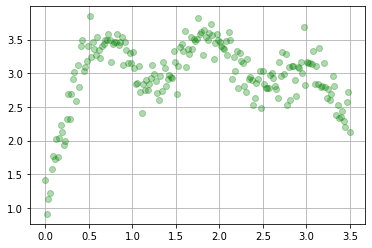

In [4]:
plt.plot(frequency_powers.numpy(), experimental_dlts.numpy(), 'og', alpha=0.3)
plt.grid()
plt.show()

In [5]:
n_exps = 3
exps_params = [[np.random.uniform(low=-3.5, high=-1), 1.0] for _ in range(n_exps)]

fs = MultiExpFrequencyScan(n_exps=n_exps,
                           exps_params=exps_params,
                           n_iters=200,
                           stop_val=10**-5,
                           verbose=True
                          )

initial_model = fs(frequency_powers)

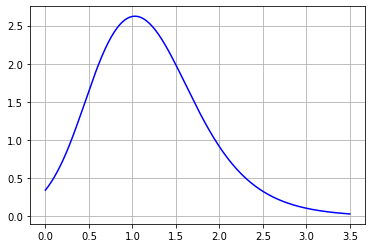

In [6]:
plt.plot(frequency_powers.numpy(), initial_model.numpy(), '-b')

plt.grid()
plt.show()

In [7]:
fit_results = fs.fit(frequency_powers, experimental_dlts)
fit_results

iter # 0
exps_params:
 [[-1.72445675  1.        ]
 [-1.21847274  1.        ]
 [-1.1825718   1.        ]]
Loss: 4.2407132655759066
iter # 1
exps_params:
 [[-1.79934346  1.10655211]
 [-1.22458068  1.0883314 ]
 [-1.1874264   1.08813656]]
Loss: 3.9209865542480498
iter # 2
exps_params:
 [[-1.89262019  1.20641113]
 [-1.22405484  1.16643024]
 [-1.18512994  1.16628584]]
Loss: 3.611076433533754
iter # 3
exps_params:
 [[-2.00247756  1.30400005]
 [-1.21794487  1.2371734 ]
 [-1.17712454  1.23726716]]
Loss: 3.290379893524273
iter # 4
exps_params:
 [[-2.12177875  1.40297351]
 [-1.20912243  1.30308644]
 [-1.16664119  1.30350154]]
Loss: 2.961854120561891
iter # 5
exps_params:
 [[-2.23876514  1.50487757]
 [-1.20147391  1.3658302 ]
 [-1.15766432  1.36651913]]
Loss: 2.6482802732322535
iter # 6
exps_params:
 [[-2.34269694  1.6086379 ]
 [-1.19784139  1.42591328]
 [-1.15280078  1.42674123]]
Loss: 2.3706787871046835
iter # 7
exps_params:
 [[-2.42896282  1.71179326]
 [-1.19874567  1.48304252]
 [-1.15218919  1

iter # 63
exps_params:
 [[-3.34196215  3.0258137 ]
 [-2.10252246  2.63852244]
 [-0.95668835  2.93147945]]
Loss: 0.136567177604005
iter # 64
exps_params:
 [[-3.34793772  3.01783968]
 [-2.10867401  2.64830677]
 [-0.95798948  2.94890246]]
Loss: 0.13125962317946388
iter # 65
exps_params:
 [[-3.35365754  3.00984202]
 [-2.11456963  2.65779504]
 [-0.95923364  2.96581474]]
Loss: 0.12623914361503302
iter # 66
exps_params:
 [[-3.35913533  3.00183546]
 [-2.12022387  2.66699571]
 [-0.96042454  2.98222485]]
Loss: 0.12149098217250036
iter # 67
exps_params:
 [[-3.36438391  2.99383327]
 [-2.12565019  2.67591721]
 [-0.9615656   2.99814205]]
Loss: 0.11700099812612759
iter # 68
exps_params:
 [[-3.36941525  2.98584745]
 [-2.13086104  2.6845679 ]
 [-0.96265994  3.01357616]]
Loss: 0.11275566258345605
iter # 69
exps_params:
 [[-3.3742405   2.97788877]
 [-2.13586793  2.69295602]
 [-0.9637104   3.02853744]]
Loss: 0.10874205050079283
iter # 70
exps_params:
 [[-3.37887006  2.96996694]
 [-2.14068151  2.70108969]


iter # 125
exps_params:
 [[-3.48469568  2.67043872]
 [-2.25714134  2.92032159]
 [-0.98924907  3.40426502]]
Loss: 0.04188805038056577
iter # 126
exps_params:
 [[-3.48533917  2.66739712]
 [-2.25792694  2.92203674]
 [-0.98941206  3.40650192]]
Loss: 0.041707822440537806
iter # 127
exps_params:
 [[-3.48596306  2.66442073]
 [-2.25869023  2.92371038]
 [-0.98957015  3.40866587]]
Loss: 0.041536625157155976
iter # 128
exps_params:
 [[-3.48656803  2.66150833]
 [-2.2594319   2.92534369]
 [-0.98972349  3.41075932]]
Loss: 0.041373990372243215
iter # 129
exps_params:
 [[-3.48715472  2.65865872]
 [-2.2601526   2.92693777]
 [-0.98987223  3.41278466]]
Loss: 0.04121947518074678
iter # 130
exps_params:
 [[-3.48772376  2.65587069]
 [-2.26085299  2.92849372]
 [-0.99001651  3.41474417]]
Loss: 0.04107266051026365
iter # 131
exps_params:
 [[-3.48827576  2.65314308]
 [-2.26153369  2.93001259]
 [-0.99015645  3.41664006]]
Loss: 0.0409331497836071
iter # 132
exps_params:
 [[-3.48881128  2.65047472]
 [-2.26219529  

,loss,n_exps,time_constatn_power_0,amplitude_0,time_constatn_power_1,amplitude_1,time_constatn_power_2,amplitude_2
0,4.240713,3,-1.724457,1.000000,-1.218473,1.000000,-1.182572,1.000000
1,3.920987,3,-1.799343,1.106552,-1.224581,1.088331,-1.187426,1.088137
2,3.611076,3,-1.892620,1.206411,-1.224055,1.166430,-1.185130,1.166286
3,3.29038,3,-2.002478,1.304000,-1.217945,1.237173,-1.177125,1.237267
4,2.961854,3,-2.121779,1.402974,-1.209122,1.303086,-1.166641,1.303502
...,...,...,...,...,...,...,...,...
181,0.038436,3,-3.502727,2.572231,-2.279729,2.974600,-0.993695,3.462819
182,0.038424,3,-3.502862,2.571378,-2.279899,2.975083,-0.993724,3.463190
183,0.038414,3,-3.502994,2.570546,-2.280066,2.975554,-0.993753,3.463550
184,0.038403,3,-3.503122,2.569732,-2.280228,2.976016,-0.993781,3.463899


In [8]:
for scan in fs._fs_list:
    print(scan)

In [9]:
for i, f in enumerate(fs._fs_list):
    print(f'Amplitude {i} : {f.amplitude}')
    print(f'Time constant power {i} : {f.time_constant_power}')

Amplitude 0 : 2.5681608504956546
Time constant power 0 : -3.503369179722091
Amplitude 1 : 2.9769110304495934
Time constant power 1 : -2.28053957369712
Amplitude 2 : 3.4645662552858445
Time constant power 2 : -0.9938335585056289


In [10]:
fs.exps_params

array([[-3.50336918,  2.56816085],
       [-2.28053957,  2.97691103],
       [-0.99383356,  3.46456626]])

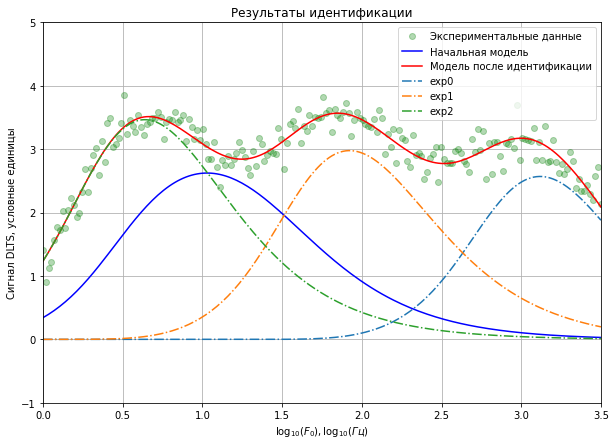

In [11]:
def plot_ident_res(frequency_powers,
                   experimental_dlts, 
                   fit_results
                  ):
    
    n_exps=fit_results.loc[0, 'n_exps']
    
    init_params = fit_results.iloc[0, :]
    init_params = [[init_params[f'time_constatn_power_{i}'], init_params[f'amplitude_{i}']] for i in range(n_exps)]
    
    fs = MultiExpFrequencyScan(n_exps=n_exps, exps_params=init_params)
    initial_model = fs(frequency_powers).numpy()
    
    
    final_params = fit_results.iloc[-1, :]
    final_params = [[final_params[f'time_constatn_power_{i}'], final_params[f'amplitude_{i}']] for i in range(n_exps)]
    
    fs.exps_params=final_params
    final_model = fs(frequency_powers).numpy()
    

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))

    ax.plot(frequency_powers, experimental_dlts, 'og', alpha=0.3, label='Экспериментальные данные')

    ax.plot(frequency_powers, initial_model, '-b', label='Начальная модель')

    ax.plot(frequency_powers, final_model, '-r', label='Модель после идентификации')

    for i, scan in enumerate(fs._fs_list):
        plt.plot(frequency_powers, scan(frequency_powers), '-.', label=f'exp{i}')

    ax.legend()
    ax.grid()
    ax.set_xlim([0, 3.5])
    ylim = ax.get_ylim()
    ylim = [np.floor(ylim[0]), np.ceil(ylim[1])]
    ax.set_ylim(ylim)
    
    ax.set_title('Результаты идентификации')
    ax.set_xlabel(r'$\log_{10}(F_0), \log_{10}(Гц)$')
    ax.set_ylabel('Сигнал DLTS, условные единицы')
    
    return fig, ax


final_model = fs(frequency_powers)

fig, ax = plot_ident_res(frequency_powers.numpy(),
                         experimental_dlts.numpy(), 
                         fit_results
                        )

plt.show()

# Проверка прототипа модели на частотном скане из 5 экспоненциальных составляющих

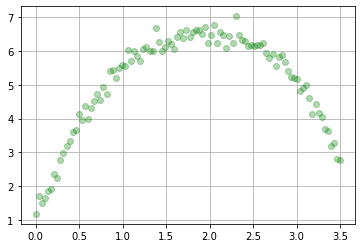

In [12]:
fs = MultiExpFrequencyScan(n_exps=5,
                           exps_params=[[-1.0, 3.50],
                                        [-1.7, 3.25],
                                        [-2.3, 3.00],
                                        [-2.9, 2.75],
                                        [-3.5, 2.50]]
                          )

frequency_powers = np.linspace(0, 3.5, 100)
frequency_powers = tf.Variable(frequency_powers, dtype='float64')
experimental_dlts = fs(frequency_powers) 
experimental_dlts += np.random.normal(loc=0, scale=0.2, size=experimental_dlts.shape[0])

plt.plot(frequency_powers.numpy(), experimental_dlts.numpy(), 'og', alpha=0.3)
plt.grid()
plt.show()

In [13]:
n_exps = 5
exps_params = [[np.random.uniform(low=-3.5, high=-1), 1.0] for _ in range(n_exps)]

fs = MultiExpFrequencyScan(n_exps=n_exps,
                           exps_params=exps_params,
                           n_iters=200,
                           stop_val=10**-5,
                           verbose=True
                          )

initial_model = fs(frequency_powers)

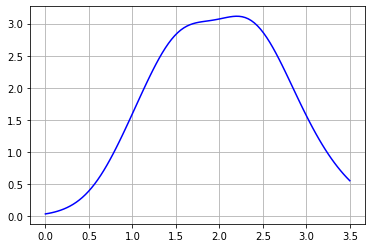

In [14]:
plt.plot(frequency_powers.numpy(), initial_model.numpy(), '-b')

plt.grid()
plt.show()

In [15]:
fit_results = fs.fit(frequency_powers, experimental_dlts)
fit_results

iter # 0
exps_params:
 [[-2.83168672  1.        ]
 [-1.94749224  1.        ]
 [-1.52541102  1.        ]
 [-2.10449432  1.        ]
 [-2.87792948  1.        ]]
Loss: 11.333036841049598
iter # 1
exps_params:
 [[-2.77935036  1.23125757]
 [-1.9186813   1.26165448]
 [-1.52409711  1.26996827]
 [-2.07525533  1.25707977]
 [-2.82144861  1.22874444]]
Loss: 8.422854132798832
iter # 2
exps_params:
 [[-2.76447222  1.42494608]
 [-1.87113626  1.46997548]
 [-1.48380025  1.4939642 ]
 [-2.0395556   1.46019946]
 [-2.80371161  1.42187752]]
Loss: 6.4439242896177085
iter # 3
exps_params:
 [[-2.7793266   1.59006486]
 [-1.81463355  1.63928352]
 [-1.41934736  1.68107452]
 [-2.00563316  1.6242802 ]
 [-2.81637344  1.58737789]]
Loss: 5.006037100174913
iter # 4
exps_params:
 [[-2.80652969  1.73528547]
 [-1.7618494   1.78175399]
 [-1.35130351  1.83994366]
 [-1.98243367  1.76228508]
 [-2.84153287  1.73321076]]
Loss: 3.917736298602331
iter # 5
exps_params:
 [[-2.83254985  1.86516311]
 [-1.72071992  1.90471056]
 [-1.2

iter # 45
exps_params:
 [[-2.76523492  2.85236107]
 [-1.59078773  2.95412083]
 [-0.98317538  3.11868883]
 [-2.19544254  2.96134524]
 [-3.42446547  2.87277529]]
Loss: 0.033535435330441656
iter # 46
exps_params:
 [[-2.76550942  2.85508732]
 [-1.59090543  2.95682888]
 [-0.98257971  3.12152979]
 [-2.19585849  2.96400599]
 [-3.42617396  2.87569196]]
Loss: 0.03313275052802342
iter # 47
exps_params:
 [[-2.76577423  2.8575984 ]
 [-1.59102178  2.95933107]
 [-0.98202919  3.1241474 ]
 [-2.19623689  2.96644736]
 [-3.42774533  2.87835432]]
Loss: 0.032792339153020184
iter # 48
exps_params:
 [[-2.76602837  2.85991234]
 [-1.5911356   2.96164443]
 [-0.98152133  3.12656016]
 [-2.19658314  2.96868765]
 [-3.42919228  2.88078307]]
Loss: 0.03250440926593849
iter # 49
exps_params:
 [[-2.7662714   2.86204559]
 [-1.59124613  2.96378459]
 [-0.98105347  3.128785  ]
 [-2.19690156  2.97074357]
 [-3.43052597  2.8829972 ]]
Loss: 0.03226073771344971
iter # 50
exps_params:
 [[-2.76650321  2.86401317]
 [-1.59135295  2.

,loss,n_exps,time_constatn_power_0,amplitude_0,time_constatn_power_1,amplitude_1,time_constatn_power_2,amplitude_2,time_constatn_power_3,amplitude_3,time_constatn_power_4,amplitude_4
0,11.333037,5,-2.831687,1.000000,-1.947492,1.000000,-1.525411,1.000000,-2.104494,1.000000,-2.877929,1.000000
1,8.422854,5,-2.779350,1.231258,-1.918681,1.261654,-1.524097,1.269968,-2.075255,1.257080,-2.821449,1.228744
2,6.443924,5,-2.764472,1.424946,-1.871136,1.469975,-1.483800,1.493964,-2.039556,1.460199,-2.803712,1.421878
3,5.006037,5,-2.779327,1.590065,-1.814634,1.639284,-1.419347,1.681075,-2.005633,1.624280,-2.816373,1.587378
4,3.917736,5,-2.806530,1.735285,-1.761849,1.781754,-1.351304,1.839944,-1.982434,1.762285,-2.841533,1.733211
...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.030978,5,-2.769014,2.881288,-1.592598,2.983828,-0.977026,3.148870,-2.200007,2.988321,-3.442603,2.900247
67,0.030965,5,-2.769120,2.881828,-1.592655,2.984440,-0.976927,3.149435,-2.200112,2.988752,-3.442942,2.900549
68,0.030953,5,-2.769222,2.882332,-1.592711,2.985016,-0.976835,3.149962,-2.200213,2.989146,-3.443258,2.900806
69,0.030943,5,-2.769321,2.882802,-1.592765,2.985561,-0.976752,3.150454,-2.200310,2.989505,-3.443553,2.901023


In [16]:
for i, f in enumerate(fs._fs_list):
    print(f'Amplitude {i} : {f.amplitude}')
    print(f'Time constant power {i} : {f.time_constant_power}')

Amplitude 0 : 2.883652184961615
Time constant power 0 : -2.769508161968757
Amplitude 1 : 2.986563247151957
Time constant power 1 : -1.5928702325089752
Amplitude 2 : 3.151344627496826
Time constant power 2 : -0.9766047923089908
Amplitude 3 : 2.9901326322852477
Time constant power 3 : -2.2004908185287
Amplitude 4 : 2.9013478963613077
Time constant power 4 : -3.4440845698993323


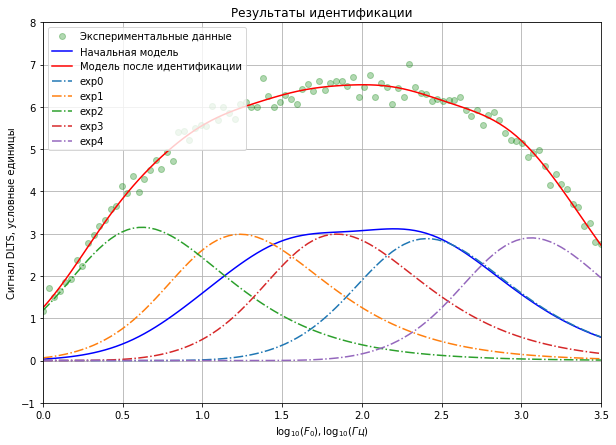

In [17]:
final_model = fs(frequency_powers)

fig, ax = plot_ident_res(frequency_powers.numpy(),
                         experimental_dlts.numpy(), 
                         fit_results
                        )

plt.show()

# Пример неудачной идентификации - недостаточное количество экспоененциальных составляющих

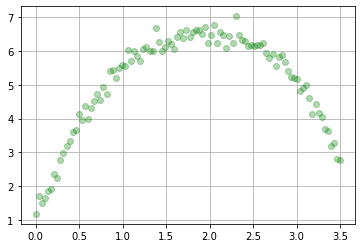

In [18]:
plt.plot(frequency_powers.numpy(), experimental_dlts.numpy(), 'og', alpha=0.3)
plt.grid()
plt.show()

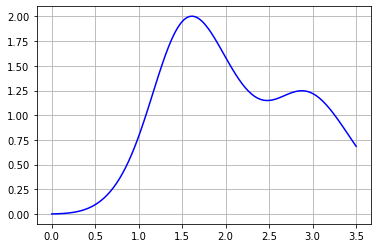

In [19]:
n_exps = 3
exps_params = [[np.random.uniform(low=-3.5, high=-1), 1.0] for _ in range(n_exps)]

fs = MultiExpFrequencyScan(n_exps=n_exps,
                           exps_params=exps_params,
                           learning_rate=0.075,
                           n_iters=400,
                           stop_val=10**-5,
                           verbose=True
                          )

initial_model = fs(frequency_powers)

plt.plot(frequency_powers.numpy(), initial_model.numpy(), '-b')

plt.grid()
plt.show()

In [20]:
fit_results = fs.fit(frequency_powers, experimental_dlts)
fit_results

iter # 0
exps_params:
 [[-1.94289024  1.        ]
 [-3.38835438  1.        ]
 [-1.98099667  1.        ]]
Loss: 17.72853945440185
iter # 1
exps_params:
 [[-1.94553217  1.25764487]
 [-3.228547    1.16408049]
 [-1.98263476  1.25772732]]
Loss: 15.33892900967332
iter # 2
exps_params:
 [[-1.93887297  1.49145791]
 [-3.08482578  1.33975971]
 [-1.9761552   1.4913473 ]]
Loss: 13.287720044399018
iter # 3
exps_params:
 [[-1.91964683  1.70190871]
 [-2.97267106  1.51844724]
 [-1.95875261  1.70134081]]
Loss: 11.595584085686994
iter # 4
exps_params:
 [[-1.88858581  1.89041274]
 [-2.89792157  1.6931347 ]
 [-1.93171759  1.88917755]]
Loss: 10.217950954169257
iter # 5
exps_params:
 [[-1.84954218  2.0593867 ]
 [-2.85694157  1.86056712]
 [-1.89955775  2.05733888]]
Loss: 9.081876460393092
iter # 6
exps_params:
 [[-1.80709578  2.21160635]
 [-2.84124057  2.02039543]
 [-1.86770088  2.20865513]]
Loss: 8.125051973906388
iter # 7
exps_params:
 [[-1.76484637  2.34958874]
 [-2.84124586  2.17340349]
 [-1.84102133  2.

iter # 63
exps_params:
 [[-1.17123593  4.71534156]
 [-3.1484716   4.68916816]
 [-2.14259686  4.70390466]]
Loss: 0.1323144107434913
iter # 64
exps_params:
 [[-1.17069833  4.72262049]
 [-3.14983632  4.69409556]
 [-2.14310579  4.71334529]]
Loss: 0.1301135808158974
iter # 65
exps_params:
 [[-1.17018685  4.72954929]
 [-3.15115351  4.69866712]
 [-2.14360449  4.72245849]]
Loss: 0.12810262968050637
iter # 66
exps_params:
 [[-1.16970009  4.73614543]
 [-3.15242536  4.70290123]
 [-2.14409332  4.73125961]]
Loss: 0.12626359338401694
iter # 67
exps_params:
 [[-1.16923673  4.74242547]
 [-3.15365394  4.70681534]
 [-2.14457266  4.73976322]]
Loss: 0.12458024978928364
iter # 68
exps_params:
 [[-1.16879554  4.74840513]
 [-3.15484125  4.710426  ]
 [-2.14504284  4.74798313]]
Loss: 0.12303794681665775
iter # 69
exps_params:
 [[-1.16837536  4.75409933]
 [-3.15598915  4.71374893]
 [-2.1455042   4.75593246]]
Loss: 0.12162344796389604
iter # 70
exps_params:
 [[-1.16797507  4.75952224]
 [-3.15709943  4.71679906]


iter # 125
exps_params:
 [[-1.16006498  4.86446672]
 [-3.18913079  4.70051354]
 [-2.16331899  4.9872709 ]]
Loss: 0.10157333965496186
iter # 126
exps_params:
 [[-1.16002929  4.86495495]
 [-3.18946249  4.69905787]
 [-2.16355477  4.98958837]]
Loss: 0.1014685431345752
iter # 127
exps_params:
 [[-1.15999505  4.86542787]
 [-3.18979015  4.69759701]
 [-2.16378874  4.9918762 ]]
Loss: 0.10136559496541782
iter # 128
exps_params:
 [[-1.15996213  4.86588622]
 [-3.19011383  4.69613171]
 [-2.16402106  4.99413515]]
Loss: 0.10126443697957836
iter # 129
exps_params:
 [[-1.15993057  4.86633075]
 [-3.1904337   4.69466267]
 [-2.16425159  4.99636596]]
Loss: 0.1011650148036582
iter # 130
exps_params:
 [[-1.15990022  4.86676214]
 [-3.19074979  4.69319057]
 [-2.16448056  4.99856936]]
Loss: 0.10106727751701851
iter # 131
exps_params:
 [[-1.15987117  4.86718106]
 [-3.19106231  4.69171602]
 [-2.16470776  5.00074601]]
Loss: 0.10097117736301559
iter # 132
exps_params:
 [[-1.15984319  4.86758812]
 [-3.19137122  4.69

,loss,n_exps,time_constatn_power_0,amplitude_0,time_constatn_power_1,amplitude_1,time_constatn_power_2,amplitude_2
0,17.728539,3,-1.942890,1.000000,-3.388354,1.000000,-1.980997,1.000000
1,15.338929,3,-1.945532,1.257645,-3.228547,1.164080,-1.982635,1.257727
2,13.28772,3,-1.938873,1.491458,-3.084826,1.339760,-1.976155,1.491347
3,11.595584,3,-1.919647,1.701909,-2.972671,1.518447,-1.958753,1.701341
4,10.217951,3,-1.888586,1.890413,-2.897922,1.693135,-1.931718,1.889178
...,...,...,...,...,...,...,...,...
168,0.098302,3,-1.158951,4.877750,-3.200439,4.639009,-2.172856,5.066814
169,0.098256,3,-1.159918,4.878059,-3.201270,4.637602,-2.171379,5.068312
170,0.098218,3,-1.158637,4.878160,-3.200685,4.636398,-2.173737,5.069747
171,0.098192,3,-1.160320,4.878531,-3.201959,4.634943,-2.171038,5.071235


In [21]:
for i, f in enumerate(fs._fs_list):
    print(f'Amplitude {i} : {f.amplitude}')
    print(f'Time constant power {i} : {f.time_constant_power}')

Amplitude 0 : 4.879024099939084
Time constant power 0 : -1.161030135822508
Amplitude 1 : 4.632284836905341
Time constant power 1 : -3.202830602935907
Amplitude 2 : 5.074111828756971
Time constant power 2 : -2.170174888576275


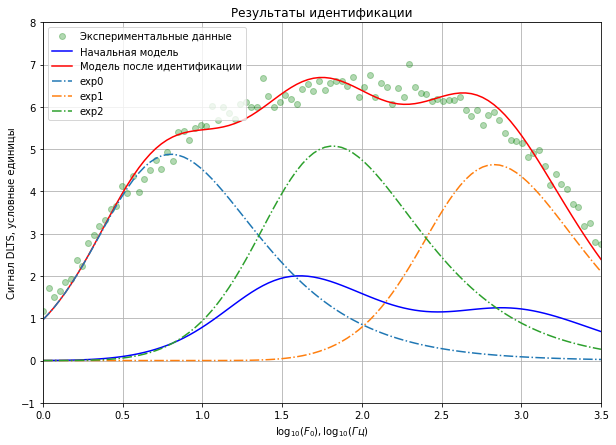

In [22]:
final_model = fs(frequency_powers)

fig, ax = plot_ident_res(frequency_powers.numpy(),
                         experimental_dlts.numpy(), 
                         fit_results
                        )

plt.show()

# Пример неудачной идентификации - избыточное количество экспоененциальных составляющих (7 вместо 5)

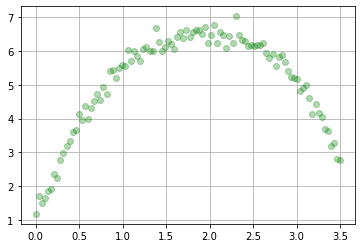

In [23]:
plt.plot(frequency_powers.numpy(), experimental_dlts.numpy(), 'og', alpha=0.3)
plt.grid()
plt.show()

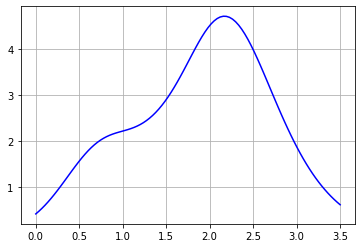

In [24]:
n_exps = 7
exps_params = [[np.random.uniform(low=-3.5, high=-1), 1.0] for _ in range(n_exps)]

fs = MultiExpFrequencyScan(n_exps=n_exps,
                           exps_params=exps_params,
                           n_iters=200,
                           stop_val=10**-5,
                           verbose=True
                          )

initial_model = fs(frequency_powers)

plt.plot(frequency_powers.numpy(), initial_model.numpy(), '-b')

plt.grid()
plt.show()

In [25]:
fit_results = fs.fit(frequency_powers, experimental_dlts)
fit_results

iter # 0
exps_params:
 [[-2.02963213  1.        ]
 [-1.03058797  1.        ]
 [-1.30180846  1.        ]
 [-2.69137235  1.        ]
 [-2.49536741  1.        ]
 [-2.76773743  1.        ]
 [-2.50467033  1.        ]]
Loss: 7.236163070743366
iter # 1
exps_params:
 [[-1.96593755  1.20386245]
 [-1.14023961  1.19002865]
 [-1.35978454  1.21299385]
 [-2.67442924  1.17142329]
 [-2.45639332  1.17681647]
 [-2.75684401  1.17037623]
 [-2.46680645  1.17645925]]
Loss: 4.901608644760948
iter # 2
exps_params:
 [[-1.89386525  1.35302766]
 [-1.19439304  1.35409719]
 [-1.36869743  1.38282462]
 [-2.6951938   1.29906074]
 [-2.43873041  1.30400947]
 [-2.78775486  1.2998554 ]
 [-2.45111635  1.30350479]]
Loss: 3.5286354313347816
iter # 3
exps_params:
 [[-1.82061558  1.46764603]
 [-1.20758957  1.48965343]
 [-1.34921317  1.5179399 ]
 [-2.743067    1.39769933]
 [-2.43375756  1.39817608]
 [-2.84817431  1.40238522]
 [-2.44888068  1.39763726]]
Loss: 2.609646735425947
iter # 4
exps_params:
 [[-1.75796728  1.5631092 ]
 

iter # 35
exps_params:
 [[-1.77916774  2.1521132 ]
 [-0.98050679  2.18116444]
 [-1.24707104  2.19796239]
 [-3.14514345  2.0558101 ]
 [-2.35058879  2.01581747]
 [-3.40022753  2.10046682]
 [-2.38672017  2.01421126]]
Loss: 0.0456789999584372
iter # 36
exps_params:
 [[-1.77752879  2.15446154]
 [-0.97647481  2.18257873]
 [-1.25064856  2.19932258]
 [-3.14261709  2.05712947]
 [-2.35127542  2.01728915]
 [-3.4047797   2.1018855 ]
 [-2.38803083  2.015701  ]]
Loss: 0.044901773876738806
iter # 37
exps_params:
 [[-1.77582973  2.15669034]
 [-0.97251585  2.18391473]
 [-1.25423155  2.20060697]
 [-3.14006336  2.05836261]
 [-2.35195724  2.01862381]
 [-3.40923865  2.10321085]
 [-2.3893599   2.01705415]]
Loss: 0.04415644904299443
iter # 38
exps_params:
 [[-1.77408113  2.15881305]
 [-0.9686371   2.18518585]
 [-1.25780454  2.20182854]
 [-3.13750382  2.05952588]
 [-2.3526309   2.01983607]
 [-3.41359705  2.10445964]
 [-2.39070433  2.01828528]]
Loss: 0.043442415584052624
iter # 39
exps_params:
 [[-1.77229325  

iter # 70
exps_params:
 [[-1.72952977  2.19932756]
 [-0.89679262  2.21354117]
 [-1.33283931  2.22782857]
 [-3.089618    2.08530378]
 [-2.35861495  2.02943435]
 [-3.49074013  2.13014216]
 [-2.42975359  2.02843958]]
Loss: 0.033970527970493505
iter # 71
exps_params:
 [[-1.7288829   2.20005104]
 [-0.89584941  2.21416186]
 [-1.33393663  2.22832123]
 [-3.08899968  2.08585818]
 [-2.35828264  2.02928426]
 [-3.49170619  2.13061963]
 [-2.43076813  2.02830169]]
Loss: 0.03390473938145561
iter # 72
exps_params:
 [[-1.72827588  2.20075184]
 [-0.8949546   2.21476872]
 [-1.33498136  2.2287966 ]
 [-3.08840608  2.08639886]
 [-2.35792693  2.02912102]
 [-3.49262577  2.13108023]
 [-2.43177582  2.02815034]]
Loss: 0.033843399150281624
iter # 73
exps_params:
 [[-1.7277074   2.20143075]
 [-0.89410596  2.21536209]
 [-1.33597567  2.22925514]
 [-3.08783549  2.08692619]
 [-2.35754859  2.02894544]
 [-3.49350155  2.13152448]
 [-2.4327773   2.02798634]]
Loss: 0.033786087116662276
iter # 74
exps_params:
 [[-1.72717615

iter # 105
exps_params:
 [[-1.72344109  2.21537255]
 [-0.88198078  2.2292853 ]
 [-1.35055169  2.23761513]
 [-3.07560356  2.09888585]
 [-2.33698882  2.02021906]
 [-3.50872994  2.13988266]
 [-2.46408472  2.01951511]]
Loss: 0.03279070736499696
iter # 106
exps_params:
 [[-1.72359335  2.21565246]
 [-0.88187718  2.229613  ]
 [-1.35067051  2.2377449 ]
 [-3.07529959  2.09915819]
 [-2.33616483  2.01992253]
 [-3.50900666  2.14002798]
 [-2.46508113  2.01922407]]
Loss: 0.032767120224033414
iter # 107
exps_params:
 [[-1.72375654  2.21592656]
 [-0.88178276  2.22993635]
 [-1.35077702  2.23786962]
 [-3.07499668  2.09942658]
 [-2.33533394  2.01962747]
 [-3.50927856  2.1401691 ]
 [-2.46607925  2.0189344 ]]
Loss: 0.03274355040769005
iter # 108
exps_params:
 [[-1.72393027  2.21619508]
 [-0.88169713  2.23025546]
 [-1.35087167  2.23798945]
 [-3.07469467  2.09969114]
 [-2.33449649  2.01933402]
 [-3.50954601  2.14030619]
 [-2.46707899  2.01864624]]
Loss: 0.032719989837538606
iter # 109
exps_params:
 [[-1.7241

iter # 139
exps_params:
 [[-1.73294051  2.22251678]
 [-0.88191523  2.23847205]
 [-1.34970867  2.23993774]
 [-3.06533048  2.10643071]
 [-2.30699173  2.01156693]
 [-3.51683952  2.1431551 ]
 [-2.49806588  2.01100783]]
Loss: 0.03199879149050295
iter # 140
exps_params:
 [[-1.73330669  2.22267316]
 [-0.88198239  2.23869199]
 [-1.34958149  2.23995858]
 [-3.06502462  2.10661028]
 [-2.30610679  2.01136814]
 [-3.5170639   2.14321509]
 [-2.49903199  2.0108123 ]]
Loss: 0.031976811422835205
iter # 141
exps_params:
 [[-1.73367543  2.22282728]
 [-0.88205191  2.23890947]
 [-1.34945073  2.23997745]
 [-3.06471878  2.10678788]
 [-2.30522493  2.01117273]
 [-3.51728812  2.14327366]
 [-2.49999378  2.0106201 ]]
Loss: 0.03195499388016506
iter # 142
exps_params:
 [[-1.73404656  2.22297921]
 [-0.88212371  2.23912452]
 [-1.34931654  2.23999442]
 [-3.06441302  2.10696351]
 [-2.30434639  2.0109807 ]
 [-3.51751218  2.14333084]
 [-2.50095107  2.01043121]]
Loss: 0.031933346122859134
iter # 143
exps_params:
 [[-1.7344

iter # 173
exps_params:
 [[-1.7459238   2.22679484]
 [-0.8850821   2.24470053]
 [-1.34413999  2.2397671 ]
 [-3.05529607  2.11153629]
 [-2.27968502  2.0065315 ]
 [-3.52424029  2.14456298]
 [-2.52758323  2.00605567]]
Loss: 0.03137444455347636
iter # 174
exps_params:
 [[-1.74629661  2.22689422]
 [-0.88519044  2.24484876]
 [-1.34395886  2.23974073]
 [-3.05502377  2.11165845]
 [-2.27899287  2.00642955]
 [-3.524444    2.14458903]
 [-2.52832613  2.00595529]]
Loss: 0.031360522703969024
iter # 175
exps_params:
 [[-1.74666764  2.22699239]
 [-0.88529902  2.24499523]
 [-1.34377781  2.23971345]
 [-3.05475337  2.11177919]
 [-2.27830789  2.00632973]
 [-3.52464646  2.14461441]
 [-2.52906116  2.00585697]]
Loss: 0.03134686332867755
iter # 176
exps_params:
 [[-1.74703682  2.22708937]
 [-0.88540779  2.24513996]
 [-1.34359691  2.23968528]
 [-3.05448491  2.11189851]
 [-2.27763009  2.00623198]
 [-3.52484764  2.14463912]
 [-2.52978829  2.00576069]]
Loss: 0.03133346502319627
iter # 177
exps_params:
 [[-1.74740

,loss,n_exps,time_constatn_power_0,amplitude_0,time_constatn_power_1,amplitude_1,time_constatn_power_2,amplitude_2,time_constatn_power_3,amplitude_3,time_constatn_power_4,amplitude_4,time_constatn_power_5,amplitude_5,time_constatn_power_6,amplitude_6
0,7.236163,7,-2.029632,1.000000,-1.030588,1.000000,-1.301808,1.000000,-2.691372,1.000000,-2.495367,1.000000,-2.767737,1.000000,-2.504670,1.000000
1,4.901609,7,-1.965938,1.203862,-1.140240,1.190029,-1.359785,1.212994,-2.674429,1.171423,-2.456393,1.176816,-2.756844,1.170376,-2.466806,1.176459
2,3.528635,7,-1.893865,1.353028,-1.194393,1.354097,-1.368697,1.382825,-2.695194,1.299061,-2.438730,1.304009,-2.787755,1.299855,-2.451116,1.303505
3,2.609647,7,-1.820616,1.467646,-1.207590,1.489653,-1.349213,1.517940,-2.743067,1.397699,-2.433758,1.398176,-2.848174,1.402385,-2.448881,1.397637
4,1.941857,7,-1.757967,1.563109,-1.205441,1.601034,-1.326068,1.628101,-2.801054,1.479130,-2.428468,1.473478,-2.919255,1.488709,-2.446793,1.472899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,0.031213,7,-1.750611,2.227998,-0.886498,2.246496,-1.341810,2.239359,-3.051914,2.113017,-2.271249,2.005360,-3.526783,2.144853,-2.536625,2.004900
187,0.031203,7,-1.750956,2.228083,-0.886606,2.246623,-1.341634,2.239322,-3.051668,2.113122,-2.270650,2.005282,-3.526968,2.144871,-2.537266,2.004823
188,0.031192,7,-1.751298,2.228167,-0.886714,2.246749,-1.341460,2.239285,-3.051425,2.113225,-2.270059,2.005206,-3.527152,2.144889,-2.537899,2.004748
189,0.031182,7,-1.751637,2.228250,-0.886822,2.246873,-1.341286,2.239247,-3.051185,2.113327,-2.269474,2.005132,-3.527334,2.144906,-2.538524,2.004675


In [26]:
for i, f in enumerate(fs._fs_list):
    print(f'Amplitude {i} : {f.amplitude}')
    print(f'Time constant power {i} : {f.time_constant_power}')

Amplitude 0 : 2.228413455254953
Time constant power 0 : -1.7523072234464394
Amplitude 1 : 2.2471165770319965
Time constant power 1 : -0.8870370769278786
Amplitude 2 : 2.23916851818778
Time constant power 2 : -1.3409412902039637
Amplitude 3 : 2.113527982277629
Time constant power 3 : -3.0507098666885124
Amplitude 4 : 2.00498726843954
Time constant power 4 : -2.2683264150907596
Amplitude 5 : 2.1449393254380698
Time constant power 5 : -3.5276933596535405
Amplitude 6 : 2.004531647941492
Time constant power 6 : -2.5397505734566024


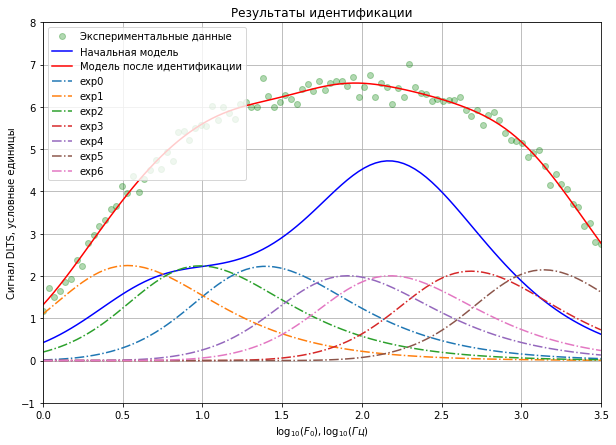

In [27]:
final_model = fs(frequency_powers)

fig, ax = plot_ident_res(frequency_powers.numpy(),
                         experimental_dlts.numpy(), 
                         fit_results
                        )

plt.show()

# Пример неудачной идентификации - избыточное количество экспоененциальных составляющих (15 вместо 5)

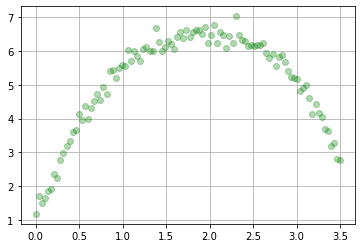

In [28]:
plt.plot(frequency_powers.numpy(), experimental_dlts.numpy(), 'og', alpha=0.3)
plt.grid()
plt.show()

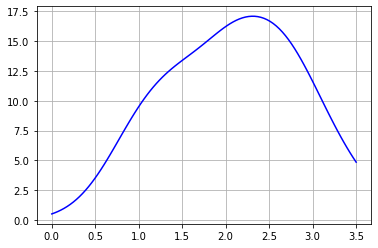

In [29]:
n_exps = 30
exps_params = [[np.random.uniform(low=-3.5, high=-1), 1.0] for _ in range(n_exps)]

fs = MultiExpFrequencyScan(n_exps=n_exps,
                           exps_params=exps_params,
                           n_iters=200,
                           stop_val=10**-5,
                           verbose=True
                          )

initial_model = fs(frequency_powers)

plt.plot(frequency_powers.numpy(), initial_model.numpy(), '-b')

plt.grid()
plt.show()

In [30]:
fit_results = fs.fit(frequency_powers, experimental_dlts)
fit_results

iter # 0
exps_params:
 [[-1.47021743  1.        ]
 [-1.86271268  1.        ]
 [-3.34876249  1.        ]
 [-2.56973721  1.        ]
 [-1.67084608  1.        ]
 [-2.02688658  1.        ]
 [-2.62569492  1.        ]
 [-2.59843004  1.        ]
 [-1.43971928  1.        ]
 [-1.83704677  1.        ]
 [-1.64466409  1.        ]
 [-2.59567137  1.        ]
 [-3.23657149  1.        ]
 [-3.07154392  1.        ]
 [-2.53861777  1.        ]
 [-1.17138944  1.        ]
 [-2.11603493  1.        ]
 [-2.31578036  1.        ]
 [-3.21219232  1.        ]
 [-2.10771565  1.        ]
 [-1.5617149   1.        ]
 [-2.81815674  1.        ]
 [-3.29239886  1.        ]
 [-2.50122277  1.        ]
 [-2.72675191  1.        ]
 [-3.07036127  1.        ]
 [-1.29352119  1.        ]
 [-2.79230935  1.        ]
 [-1.4599171   1.        ]
 [-3.09940951  1.        ]]
Loss: 44.68806865849141
iter # 1
exps_params:
 [[-1.05142677  0.6096999 ]
 [-1.55476678  0.46402393]
 [-3.81929342  0.60302226]
 [-2.63508091  0.36584404]
 [-1.297190

iter # 10
exps_params:
 [[-1.14270644  0.5623132 ]
 [-1.69569001  0.5421667 ]
 [-3.8250304   0.48640003]
 [-2.55482926  0.49722006]
 [-1.43892082  0.53632209]
 [-1.88799894  0.55201715]
 [-2.63947727  0.48376114]
 [-2.59789817  0.49035191]
 [-1.09869106  0.57003509]
 [-1.66364983  0.54056318]
 [-1.40096631  0.53735051]
 [-2.59372459  0.4910164 ]
 [-3.63701389  0.44100609]
 [-3.35240148  0.4136701 ]
 [-2.50905934  0.50450398]
 [-0.76388314  0.6666439 ]
 [-1.98729928  0.55437901]
 [-2.21488061  0.54435801]
 [-3.59475357  0.43393862]
 [-1.97807282  0.55430473]
 [-1.27814521  0.5450933 ]
 [-2.94139648  0.44024732]
 [-3.73241107  0.46112179]
 [-2.45552365  0.5128976 ]
 [-2.79708956  0.45977803]
 [-3.35040308  0.4136363 ]
 [-0.90297605  0.61802613]
 [-2.90053553  0.44546103]
 [-1.12774959  0.56481617]
 [-3.39973701  0.41506918]]
Loss: 0.04943823675953744
iter # 11
exps_params:
 [[-1.14220643  0.56161059]
 [-1.69715332  0.54252988]
 [-3.82375319  0.4814156 ]
 [-2.55498533  0.49728315]
 [-1.44

iter # 20
exps_params:
 [[-1.13731598  0.55963674]
 [-1.7045811   0.54636553]
 [-3.80999268  0.45292657]
 [-2.55790801  0.49414796]
 [-1.4490862   0.53522959]
 [-1.8871328   0.55770019]
 [-2.64763803  0.48170259]
 [-2.603696    0.48767967]
 [-1.0913348   0.56786845]
 [-1.67367283  0.54421028]
 [-1.4097114   0.53557505]
 [-2.59926847  0.48829459]
 [-3.60744284  0.41781561]
 [-3.32734184  0.41080899]
 [-2.50912807  0.50128361]
 [-0.7547912   0.66998359]
 [-1.98119815  0.55944906]
 [-2.20299449  0.54536723]
 [-3.56385519  0.41380816]
 [-1.97241954  0.55946958]
 [-1.28040087  0.54199455]
 [-2.94960478  0.44539297]
 [-3.70855977  0.43184248]
 [-2.45216524  0.50985793]
 [-2.80964116  0.46146219]
 [-3.3254721   0.41089373]
 [-0.89201106  0.61914933]
 [-2.91077321  0.44978213]
 [-1.12164959  0.5622962 ]
 [-3.37195111  0.40922502]]
Loss: 0.03991645157921289
iter # 21
exps_params:
 [[-1.13683575  0.55950504]
 [-1.70526633  0.54679325]
 [-3.80850941  0.45075463]
 [-2.55809239  0.49366723]
 [-1.44

iter # 30
exps_params:
 [[-1.13272141  0.5583927 ]
 [-1.71115927  0.55021908]
 [-3.79641408  0.43552141]
 [-2.55843863  0.48943706]
 [-1.45694468  0.53507667]
 [-1.88593986  0.56250168]
 [-2.65362862  0.47761737]
 [-2.60707577  0.48315622]
 [-1.08542321  0.5670616 ]
 [-1.68117291  0.54767078]
 [-1.41641552  0.53487759]
 [-2.60237577  0.48374092]
 [-3.5872721   0.40898291]
 [-3.31536458  0.41389087]
 [-2.50666876  0.49667256]
 [-0.75002211  0.67285528]
 [-1.97566278  0.56369177]
 [-2.19135048  0.54593556]
 [-3.54368366  0.40711666]
 [-1.96726869  0.56379432]
 [-1.28173124  0.54027858]
 [-2.9604761   0.4484091 ]
 [-3.69037699  0.41827778]
 [-2.44651544  0.50572245]
 [-2.82185048  0.46076887]
 [-3.31360469  0.41402837]
 [-0.88492614  0.62073691]
 [-2.92267697  0.4518224 ]
 [-1.11656365  0.56118957]
 [-3.35751915  0.41090308]]
Loss: 0.036178868192813234
iter # 31
exps_params:
 [[-1.13227664  0.55828267]
 [-1.71177394  0.55054608]
 [-3.79520717  0.43418288]
 [-2.55836918  0.48899919]
 [-1.4

iter # 40
exps_params:
 [[-1.12840244  0.55745228]
 [-1.71683202  0.55302246]
 [-3.78543241  0.42418872]
 [-2.55720735  0.48544605]
 [-1.46299508  0.53466108]
 [-1.88606621  0.56626257]
 [-2.65716154  0.47386082]
 [-2.60828821  0.47916334]
 [-1.08027936  0.56652519]
 [-1.6874843   0.5501502 ]
 [-1.42142439  0.53403653]
 [-2.60335031  0.47973719]
 [-3.57284081  0.40443902]
 [-3.30843902  0.41706462]
 [-2.50299397  0.49294809]
 [-0.7479194   0.67485407]
 [-1.97250104  0.56721406]
 [-2.18244458  0.54698731]
 [-3.52958466  0.40410251]
 [-1.96440815  0.56736066]
 [-1.2820462   0.53873413]
 [-2.96960838  0.45016352]
 [-3.6766329   0.41013573]
 [-2.44041487  0.50260293]
 [-2.83132557  0.45955657]
 [-3.30676274  0.41723069]
 [-0.88029881  0.62202296]
 [-2.93242641  0.45278862]
 [-1.11191977  0.56037996]
 [-3.34868981  0.41328767]]
Loss: 0.03423534165463313
iter # 41
exps_params:
 [[-1.12799054  0.5573774 ]
 [-1.71733889  0.55324986]
 [-3.78445652  0.42326215]
 [-2.55703698  0.4850942 ]
 [-1.46

iter # 50
exps_params:
 [[-1.12449809  0.55683852]
 [-1.72141408  0.55493798]
 [-3.77651406  0.41611389]
 [-2.55531998  0.48228181]
 [-1.46743189  0.53410301]
 [-1.88681585  0.56901952]
 [-2.65926725  0.47071741]
 [-2.6084168   0.47590278]
 [-1.07596076  0.56626786]
 [-1.69250001  0.55181208]
 [-1.42495248  0.53316413]
 [-2.60327931  0.47647636]
 [-3.56205859  0.40178273]
 [-3.30398746  0.41976512]
 [-2.49918654  0.49010822]
 [-0.74791292  0.67616524]
 [-1.97089284  0.5699069 ]
 [-2.17606189  0.54811083]
 [-3.5192177   0.40257855]
 [-1.96302104  0.57007458]
 [-1.28158809  0.53744055]
 [-2.97698542  0.45130848]
 [-3.66596711  0.40469409]
 [-2.43484551  0.50036737]
 [-2.83869914  0.45835131]
 [-3.3023751   0.4199486 ]
 [-0.87771264  0.62306604]
 [-2.94022243  0.45331055]
 [-1.10783193  0.55988485]
 [-3.3427677   0.41549344]]
Loss: 0.03312933000249717
iter # 51
exps_params:
 [[-1.12413529  0.55679195]
 [-1.72181529  0.55509015]
 [-3.77571642  0.41543143]
 [-2.55511647  0.48200585]
 [-1.46

iter # 60
exps_params:
 [[-1.12109865  0.55646779]
 [-1.72501176  0.55620287]
 [-3.76918656  0.4100617 ]
 [-2.55324882  0.47980638]
 [-1.47065491  0.5334896 ]
 [-1.88778991  0.57098199]
 [-2.66050906  0.46814421]
 [-2.60799114  0.47328517]
 [-1.07244818  0.56619891]
 [-1.69639529  0.55288203]
 [-1.42739714  0.53232202]
 [-2.60268788  0.47386435]
 [-3.55376401  0.40010397]
 [-3.30092741  0.4219787 ]
 [-2.49562805  0.48796551]
 [-0.74941572  0.67691562]
 [-1.97021959  0.57189238]
 [-2.17161585  0.54913081]
 [-3.51133821  0.40176088]
 [-1.96250517  0.57206819]
 [-1.28067928  0.53637998]
 [-2.98293337  0.45211526]
 [-3.6575161   0.40082275]
 [-2.43004094  0.49877958]
 [-2.84452001  0.45727939]
 [-3.29936459  0.42217366]
 [-0.87668663  0.62386512]
 [-2.94647858  0.45362194]
 [-1.10435456  0.55961715]
 [-3.3385602   0.41737393]]
Loss: 0.032461692969038426
iter # 61
exps_params:
 [[-1.12078583  0.55644089]
 [-1.72532433  0.55630146]
 [-3.76852677  0.40953973]
 [-2.5530405   0.47959083]
 [-1.4

iter # 70
exps_params:
 [[-1.11817191  0.55626172]
 [-1.72780646  0.55700992]
 [-3.76309544  0.40537971]
 [-2.55119091  0.47787172]
 [-1.47301431  0.53286687]
 [-1.88879799  0.57235394]
 [-2.66119974  0.4660444 ]
 [-2.60727479  0.47118729]
 [-1.06961113  0.5662449 ]
 [-1.69939923  0.55353985]
 [-1.42909238  0.53153251]
 [-2.60183388  0.47177538]
 [-3.54725128  0.39898838]
 [-3.29872846  0.42378197]
 [-2.49242583  0.48635064]
 [-0.751912    0.67725584]
 [-1.97010273  0.57332926]
 [-2.16858966  0.55000069]
 [-3.50521184  0.40131346]
 [-1.96249768  0.57350591]
 [-1.27953581  0.53550775]
 [-2.98776113  0.45271166]
 [-3.65071237  0.39795736]
 [-2.42598137  0.49765658]
 [-2.84918086  0.45635675]
 [-3.29720456  0.4239849 ]
 [-0.87674821  0.62445919]
 [-2.95154501  0.45382016]
 [-1.10142236  0.55949913]
 [-3.33545564  0.41894181]]
Loss: 0.03203738145373254
iter # 71
exps_params:
 [[-1.11790236  0.55624777]
 [-1.72804859  0.55707133]
 [-3.76254355  0.40497046]
 [-2.55098953  0.47770303]
 [-1.47

iter # 80
exps_params:
 [[-1.11564077  0.55616229]
 [-1.72996835  0.55750203]
 [-3.75797721  0.40167897]
 [-2.54922744  0.47635527]
 [-1.47477793  0.53225944]
 [-1.88974929  0.57329791]
 [-2.66152679  0.46432492]
 [-2.60640848  0.46949988]
 [-1.06729686  0.56635695]
 [-1.70171438  0.55391763]
 [-1.43028756  0.5308013 ]
 [-2.60085275  0.47009876]
 [-3.54205937  0.39822275]
 [-3.29709878  0.42525588]
 [-2.48958574  0.4851326 ]
 [-0.75500527  0.67732096]
 [-1.97031023  0.57435605]
 [-2.16659008  0.55072365]
 [-3.50036915  0.40107447]
 [-1.96277881  0.57452947]
 [-1.27829189  0.53477956]
 [-2.99171534  0.45316684]
 [-3.64516466  0.39577937]
 [-2.42257333  0.49686786]
 [-2.85296313  0.4555694 ]
 [-3.29560582  0.42546455]
 [-0.87751401  0.62489917]
 [-2.95569103  0.45395155]
 [-1.09893233  0.5594751 ]
 [-3.33310377  0.42024356]]
Loss: 0.031754554582860174
iter # 81
exps_params:
 [[-1.11540626  0.55615652]
 [-1.73015532  0.55753816]
 [-3.75751081  0.40135233]
 [-2.54903774  0.47622274]
 [-1.4

iter # 90
exps_params:
 [[-1.11342559  0.55612876]
 [-1.73163492  0.55778183]
 [-3.75363376  0.39870688]
 [-2.54738968  0.47516174]
 [-1.47614094  0.53168079]
 [-1.89059994  0.57393501]
 [-2.66161035  0.46290855]
 [-2.60547262  0.46813516]
 [-1.0653719   0.56650334]
 [-1.7035003   0.55410977]
 [-1.43116144  0.53012765]
 [-2.59982051  0.4687458 ]
 [-3.53787072  0.39768639]
 [-3.29586223  0.42646842]
 [-2.48707908  0.48421347]
 [-0.75841284  0.67721385]
 [-1.97069622  0.57508045]
 [-2.16533039  0.55131819]
 [-3.49649198  0.40095846]
 [-1.96321178  0.57524852]
 [-1.27703027  0.53415869]
 [-2.9949846   0.45352309]
 [-3.6405928   0.3940919 ]
 [-2.41971313  0.49632112]
 [-2.85607175  0.45489792]
 [-3.2943941   0.42668134]
 [-0.87870279  0.62522962]
 [-2.95911933  0.45404154]
 [-1.09678611  0.55950687]
 [-3.33128633  0.42132683]]
Loss: 0.03155781393074725
iter # 91
exps_params:
 [[-1.11321871  0.55612787]
 [-1.73177864  0.55780114]
 [-3.75323588  0.39844255]
 [-2.54721328  0.47505719]
 [-1.47

iter # 100
exps_params:
 [[-1.1114585   0.5561332 ]
 [-1.73291167  0.55792179]
 [-3.74991422  0.39628944]
 [-2.54568655  0.47421863]
 [-1.4772419   0.5311381 ]
 [-1.89132958  0.57435297]
 [-2.66153087  0.46173433]
 [-2.60451536  0.46702494]
 [-1.06373185  0.56666364]
 [-1.70487742  0.55418265]
 [-1.43183915  0.52950841]
 [-2.59878176  0.46764771]
 [-3.53445835  0.39730571]
 [-3.29490495  0.42747319]
 [-2.48486821  0.48352074]
 [-0.76194266  0.67700638]
 [-1.97116759  0.57558247]
 [-2.16460474  0.55180509]
 [-3.49335565  0.40091681]
 [-1.96371006  0.57574425]
 [-1.27580126  0.53361676]
 [-2.99771138  0.45380859]
 [-3.63679058  0.39276508]
 [-2.41730732  0.49595079]
 [-2.85865779  0.45432451]
 [-3.29345689  0.42768935]
 [-0.88011975  0.62548404]
 [-2.96198192  0.45410584]
 [-1.09490298  0.55956868]
 [-3.32985861  0.4222324 ]]
Loss: 0.031415854351000666
iter # 101
exps_params:
 [[-1.11127325  0.55613494]
 [-1.73302117  0.55793019]
 [-3.74957185  0.39607308]
 [-2.54552364  0.47413585]
 [-1

,loss,n_exps,time_constatn_power_0,amplitude_0,time_constatn_power_1,amplitude_1,time_constatn_power_2,amplitude_2,time_constatn_power_3,amplitude_3,...,time_constatn_power_25,amplitude_25,time_constatn_power_26,amplitude_26,time_constatn_power_27,amplitude_27,time_constatn_power_28,amplitude_28,time_constatn_power_29,amplitude_29
0,44.688069,30,-1.470217,1.000000,-1.862713,1.000000,-3.348762,1.000000,-2.569737,1.000000,...,-3.070361,1.000000,-1.293521,1.000000,-2.792309,1.000000,-1.459917,1.000000,-3.099410,1.000000
1,1.354758,30,-1.051427,0.609700,-1.554767,0.464024,-3.819293,0.603022,-2.635081,0.365844,...,-3.453357,0.481907,-0.864126,0.685106,-3.009499,0.397260,-1.039671,0.614022,-3.496010,0.493231
2,0.411013,30,-1.100464,0.612013,-1.608722,0.520252,-3.810589,0.587398,-2.604804,0.448987,...,-3.416387,0.483072,-0.898056,0.675216,-2.965551,0.442640,-1.087922,0.615400,-3.461448,0.491264
3,0.197069,30,-1.122843,0.598981,-1.641674,0.535592,-3.815576,0.564211,-2.583687,0.476002,...,-3.398038,0.465820,-0.908335,0.656957,-2.938674,0.449401,-1.109613,0.601918,-3.445116,0.472405
4,0.118594,30,-1.133479,0.586496,-1.661496,0.539435,-3.821009,0.544309,-2.571030,0.486111,...,-3.386461,0.449415,-0.910541,0.642246,-2.922718,0.448116,-1.119741,0.589204,-3.434836,0.454901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0.03137,30,-1.110729,0.556141,-1.733332,0.557951,-3.748574,0.395449,-2.545043,0.473899,...,-3.293141,0.428044,-0.880720,0.625570,-2.962995,0.454127,-1.094209,0.559598,-3.329373,0.422553
105,0.031359,30,-1.110551,0.556143,-1.733430,0.557956,-3.748251,0.395248,-2.544885,0.473823,...,-3.293066,0.428129,-0.880871,0.625590,-2.963238,0.454132,-1.094040,0.559605,-3.329258,0.422629
106,0.031349,30,-1.110374,0.556146,-1.733525,0.557960,-3.747932,0.395052,-2.544729,0.473750,...,-3.292994,0.428212,-0.881023,0.625610,-2.963477,0.454137,-1.093873,0.559613,-3.329146,0.422704
107,0.031339,30,-1.110200,0.556149,-1.733617,0.557964,-3.747618,0.394859,-2.544574,0.473677,...,-3.292922,0.428293,-0.881176,0.625630,-2.963712,0.454141,-1.093707,0.559620,-3.329036,0.422779


In [31]:
for i, f in enumerate(fs._fs_list):
    print(f'Amplitude {i} : {f.amplitude}')
    print(f'Time constant power {i} : {f.time_constant_power}')

Amplitude 0 : 0.5561539232661816
Time constant power 0 : -1.1098555557068521
Amplitude 1 : 0.55797025739348
Time constant power 1 : -1.73379381442745
Amplitude 2 : 0.3944842098355854
Time constant power 2 : -3.7470034050339973
Amplitude 3 : 0.4735382850874515
Time constant power 3 : -2.5442676695141864
Amplitude 4 : 0.5306832456044992
Time constant power 4 : -1.4780891288816365
Amplitude 5 : 0.5745940000481662
Time constant power 5 : -1.8918764549955462
Amplitude 6 : 0.46084516002374404
Time constant power 6 : -2.6613658998908387
Amplitude 7 : 0.4661997554633996
Time constant power 7 : -2.603660064235744
Amplitude 8 : 0.5668089100175111
Time constant power 8 : -1.0624348353923179
Amplitude 9 : 0.5541846234523689
Time constant power 9 : -1.7058419975428094
Amplitude 10 : 0.5289943129099366
Time constant power 10 : -1.4323529364456096
Amplitude 11 : 0.46683347452238216
Time constant power 11 : -2.597863488642982
Amplitude 12 : 0.39705666855115085
Time constant power 12 : -3.5319123352536

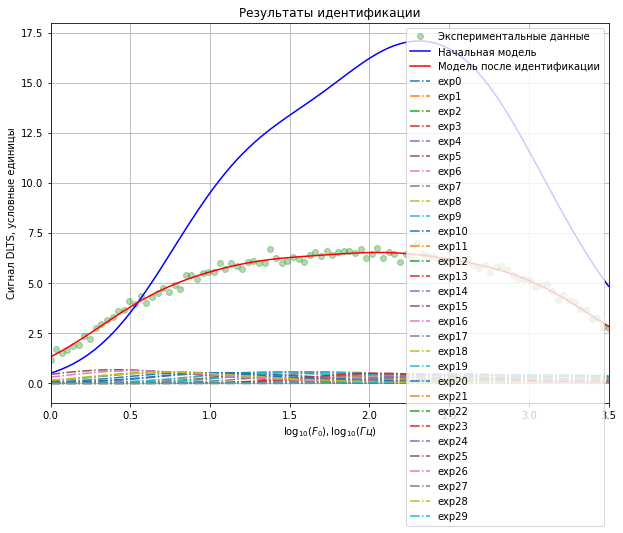

In [32]:
final_model = fs(frequency_powers)

fig, ax = plot_ident_res(frequency_powers.numpy(),
                         experimental_dlts.numpy(), 
                         fit_results
                        )

plt.show()